In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=16)

In [39]:
data = pd.read_csv('train.csv')

C:\Users\dakin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(style="white")
sns.set(style="whitegrid",font=myfont.get_name())

In [8]:
data.head()

,Unnamed: 0,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,0,1.0,1,0,0,2.169075,-1.0,1,0,0,...,0.000174,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,1,1.0,1,0,0,2.169075,-1.0,1,0,0,...,0.008724,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,2,1.0,1,0,0,1.000000,0.0,1,1,1,...,0.005359,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,1.0,1,0,0,2.169075,0.0,1,0,0,...,0.000000,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
4,4,1.0,1,0,0,1.000000,0.0,0,0,0,...,0.000603,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [24]:
data['LAST_A_ISSUE_DT'].unique()

array(['N', 'Y'], dtype=object)

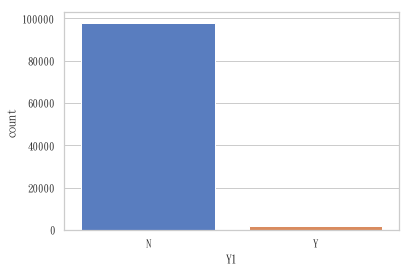

<Figure size 432x288 with 0 Axes>

In [43]:
sns.countplot(x='Y1',data=data,palette='muted')
plt.show()
plt.savefig('count_plot')

In [4]:
count_no_buy = len(data[data['Y1']=='N'])
count_buy = len(data[data['Y1']=='Y'])
pct_of_no_buy = count_no_buy/(count_no_buy+count_buy)
print("無購買重疾險商品：", pct_of_no_buy*100)
pct_of_buy = count_buy/(count_no_buy+count_buy)
print("有購買重疾險商品：", pct_of_buy*100)

無購買重疾險商品： 98.0
有購買重疾險商品： 2.0


In [15]:
pd.crosstab(data.AGE,columns=[data.LEVEL,data.Y1])

LEVEL   1.0       2.0       3.0       4.0       5.0     
Y1        N   Y     N   Y     N   Y     N   Y     N    Y
AGE                                                     
中      2379  23   860  18  1135  18  1833  71  7895  535
中高     4622  48  1295  35  1278  17  2118  61  8667  441
低       467   3    72   1   133   0   179   2   646   28
高      6377  21  1517  11  1446  14  2193  33  9973  230

In [17]:
pd.crosstab(data.GENDER,columns=[data.LEVEL,data.Y1])

LEVEL    1.0       2.0       3.0       4.0        5.0     
Y1         N   Y     N   Y     N   Y     N   Y      N    Y
GENDER                                                    
F       7356  58  2011  39  2169  32  3618  86  16293  726
M       6405  37  1711  25  1799  17  2650  78  10757  500

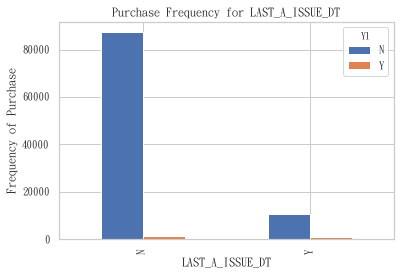

In [37]:
%matplotlib inline
pd.crosstab(data.LAST_A_ISSUE_DT,data.Y1).plot(kind='bar') #樞紐分析表
plt.title('Purchase Frequency for LAST_A_ISSUE_DT')
plt.xlabel('LAST_A_ISSUE_DT')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_LAST_A_ISSUE_DT')

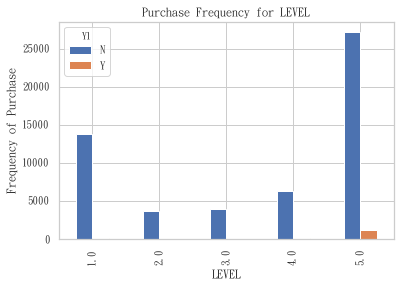

In [34]:
%matplotlib inline
pd.crosstab(data.LEVEL,data.Y1).plot(kind='bar') #樞紐分析表
plt.title('Purchase Frequency for LEVEL')
plt.xlabel('LEVEL')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_level')

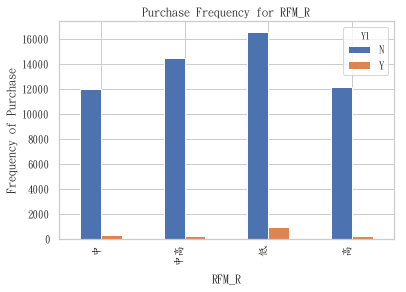

In [35]:
%matplotlib inline
pd.crosstab(data.RFM_R,data.Y1).plot(kind='bar')
plt.title('Purchase Frequency for RFM_R')
plt.xlabel('RFM_R')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_RFM_R')

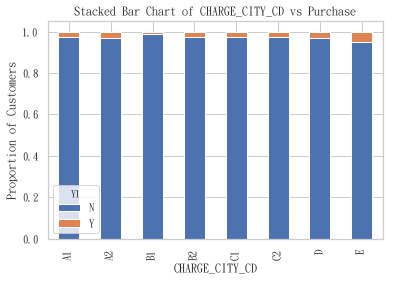

In [36]:
table=pd.crosstab(data.CHARGE_CITY_CD,data.Y1)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of CHARGE_CITY_CD vs Purchase')
plt.xlabel('CHARGE_CITY_CD')
plt.ylabel('Proportion of Customers')
plt.savefig('City_vs_pur_stack')

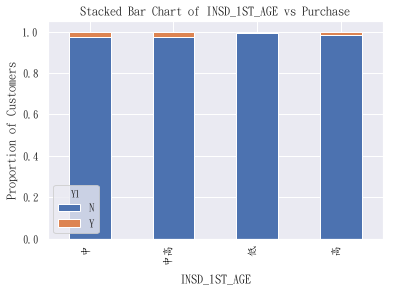

In [23]:
table=pd.crosstab(data.INSD_1ST_AGE,data.Y1)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of INSD_1ST_AGE vs Purchase')
plt.xlabel('INSD_1ST_AGE')
plt.ylabel('Proportion of Customers')
plt.savefig('INSD_1ST_AGE_vs_pur_stack')